<a href="https://colab.research.google.com/github/Vaishnavi-Kahar/New-York-Taxi-Fare-Prediction/blob/main/NY_taxiFarePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Vaishnavi Kahar


References:

1.   https://scikit-learn.org/
2.   https://www.kaggle.com/code/varunsaikanuri/life-expectancy-visualization-and-prediction

## New york taxi fare prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
link_train = "https://raw.githubusercontent.com/gagan-iitb/CS550/main/Prog_Assignments/train_NYTaxi.csv"
link_test  = "https://raw.githubusercontent.com/gagan-iitb/CS550/main/Prog_Assignments/test_NYTaxi.csv"
train = pd.read_csv(link_train)
test  = pd.read_csv(link_test)

In [ ]:
## Checking the no. of rows and columns in train and test set
print("Shape of train set : ",train.shape)
print("Shape of test set : ",test.shape)
print(list(train.columns))
print(list(test.columns))

Shape of train set :  (100000, 9)
Shape of test set :  (9914, 7)
['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [ ]:
train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5


In [ ]:
## dropping the "Unnamed: 0" column
train = train.drop("Unnamed: 0",axis=1)

In [ ]:
## Checking the non_null count and datatypes of each feature
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                100000 non-null  object 
 1   fare_amount        100000 non-null  float64
 2   pickup_datetime    100000 non-null  object 
 3   pickup_longitude   100000 non-null  float64
 4   pickup_latitude    100000 non-null  float64
 5   dropoff_longitude  100000 non-null  float64
 6   dropoff_latitude   100000 non-null  float64
 7   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


In [ ]:
# Checking for Null Values
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

As we can see there are 0 null values for all the features in train data set so we will go further and check for negative fare_amount values

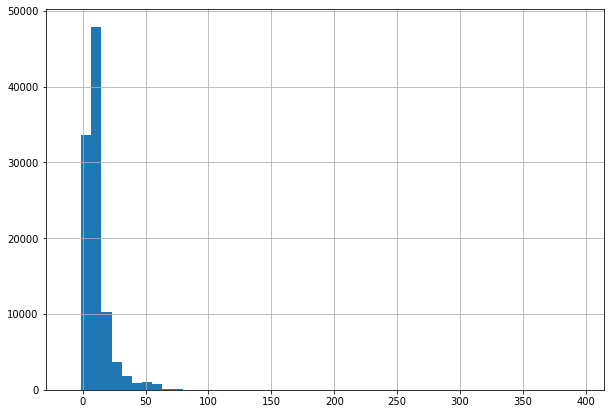

In [ ]:
train["fare_amount"].hist(bins=50,figsize=(10,7))
plt.show()

There 

In [ ]:
## checking our target column i.e. "fare_amount"
train["fare_amount"].describe()

count    100000.000000
mean         11.333564
std           9.810826
min          -9.300000
25%           6.000000
50%           8.500000
75%          12.500000
max         394.000000
Name: fare_amount, dtype: float64

We are getting **minimum fare_amount value as negative**  which is not possible , so we will drop the rows having negative fare amount.

In [ ]:
## filtering the rows having non positive fare amount
train=train.loc[train["fare_amount"]>0]
## Checking for minimum fare_amount value again
train["fare_amount"].describe()

count    99994.000000
mean        11.334431
std          9.810440
min          0.010000
25%          6.000000
50%          8.500000
75%         12.500000
max        394.000000
Name: fare_amount, dtype: float64

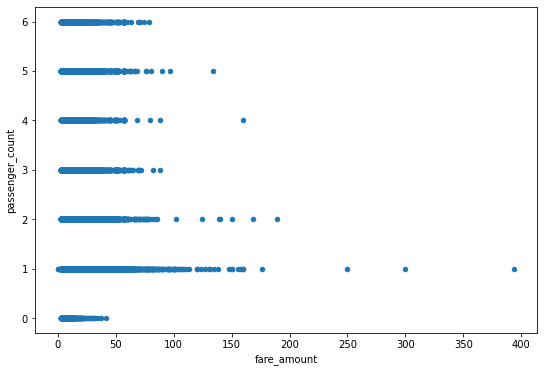

In [ ]:
## Now observing how the fare_amount varies with passenger_count
train.plot(kind="scatter",x="fare_amount",y="passenger_count",figsize=(9,6))
plt.show()

As we can see from above plot that we are getting some fare amount even for 0 passenger count which is not possible.So, we will drop the rows that have passenger_count as 0.

In [ ]:
train["passenger_count"].describe()

count    99994.000000
mean         1.682151
std          1.308636
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [ ]:
## dropping the rows having zero passenger count
train=train.loc[train["passenger_count"]>0]

In [ ]:
## using Z_score method to detect the upper limit in passenger_count
upper_passenger_count=train.passenger_count.mean() + 3*train.passenger_count.std()
print("Upper passenger_count limit is: ",upper_passenger_count)

Upper passenger_count limit is:  5.6094989684438605


In [ ]:
## filtering passenger_count to remove values above upper limit
train=train.loc[train["passenger_count"]<upper_passenger_count]


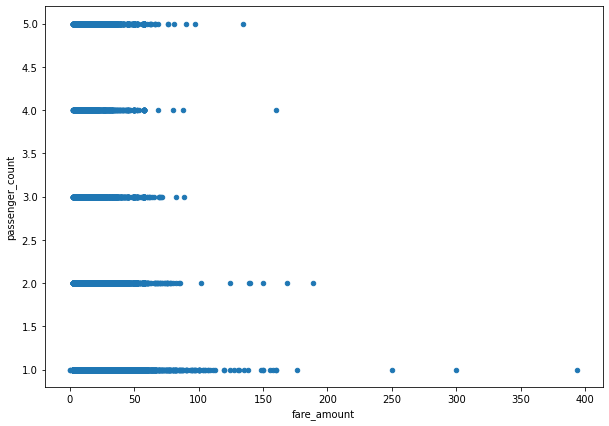

In [ ]:
train.plot(kind="scatter",x="fare_amount",y="passenger_count",figsize=(10,7))
plt.show()

As we can see from the above plot now, the passenger_count is between 1 to 5
Now we will observe the correlation of fare_amount with respect to various features

In [ ]:
corr_matrix=train.corr()
corr_matrix.style.background_gradient(cmap="RdBu_r")


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.008572,-0.008293,0.006503,-0.007629,0.010040
pickup_longitude,0.008572,1.000000,-0.961654,0.787988,-0.940025,0.002110
pickup_latitude,-0.008293,-0.961654,1.000000,-0.764715,0.946203,-0.003312
dropoff_longitude,0.006503,0.787988,-0.764715,1.000000,-0.797967,0.003010
dropoff_latitude,-0.007629,-0.940025,0.946203,-0.797967,1.000000,-0.003102
passenger_count,0.010040,0.002110,-0.003312,0.003010,-0.003102,1.000000


As we can see from above table that our fare_amount depends on passenger_count, then longitude and latitude.
So, now we will filter the outliers present in latitude and longitude

In [ ]:
train["pickup_latitude"].describe()

count    97488.000000
mean        39.897117
std          6.318497
min        -74.007632
25%         40.734777
50%         40.752452
75%         40.767023
max        404.666667
Name: pickup_latitude, dtype: float64

In [ ]:
train["pickup_longitude"].describe()

count    97488.000000
mean       -72.454156
std         10.612463
min       -121.391202
25%        -73.992141
50%        -73.981858
75%        -73.967180
max         40.801777
Name: pickup_longitude, dtype: float64

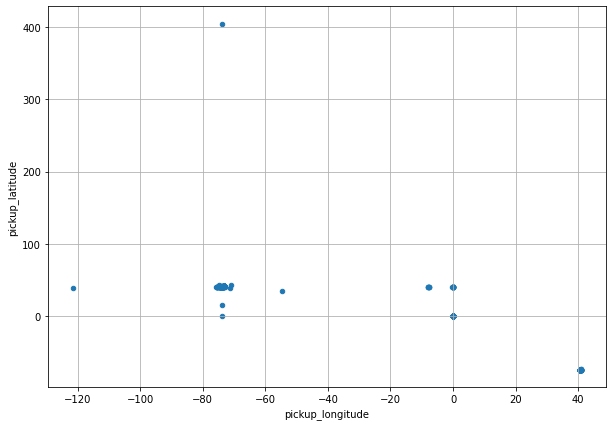

In [ ]:
train.plot(kind="scatter",x="pickup_longitude",y="pickup_latitude",figsize=(10,7))
plt.grid()
plt.show()


from the above scatter plot we can see that the range of latitude and longitude is quite large (beyond the range of new york)
New York Latitude and Longitude coordinates are :(**40.7128° N  , 74.0060° W** )
So we will filter this latitudes(in range of 40.5 to 41.8) and longitudes(in range of -75.006 to -73.006)

In [ ]:
# Latitude = 40.7128
# Longitude = -74.0060
train = train.loc[train["pickup_latitude"]<41.7128]
train = train.loc[train["pickup_latitude"]>39.7128]
train = train.loc[train["dropoff_latitude"]<41.7128]
train = train.loc[train["dropoff_latitude"]>39.7128]
train = train.loc[train["pickup_longitude"]<-73.006]
train = train.loc[train["pickup_longitude"]>-75.006]
train = train.loc[train["dropoff_longitude"]<-73.006]
train = train.loc[train["dropoff_longitude"]>-75.006]



In [ ]:
train["pickup_latitude"].describe()

count    95401.000000
mean        40.751007
std          0.030733
min         40.152382
25%         40.736357
50%         40.753190
75%         40.767476
max         41.366138
Name: pickup_latitude, dtype: float64

In [ ]:
train["pickup_longitude"].describe()

count    95401.000000
mean       -73.975155
std          0.040212
min        -74.740545
25%        -73.992363
50%        -73.982138
75%        -73.968443
max        -73.044891
Name: pickup_longitude, dtype: float64

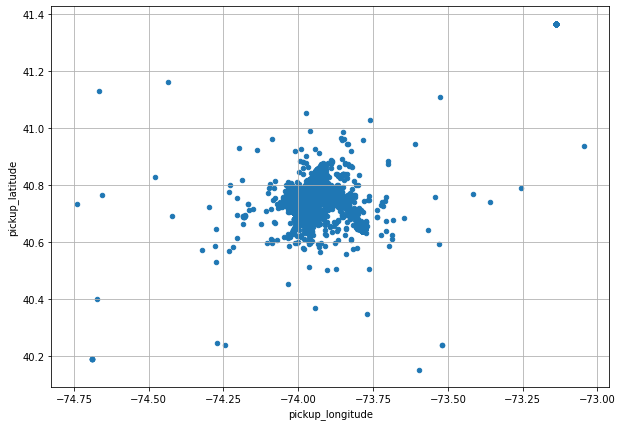

In [ ]:
train.plot(kind="scatter",x="pickup_longitude",y="pickup_latitude",figsize=(10,7))
plt.grid()
plt.show()

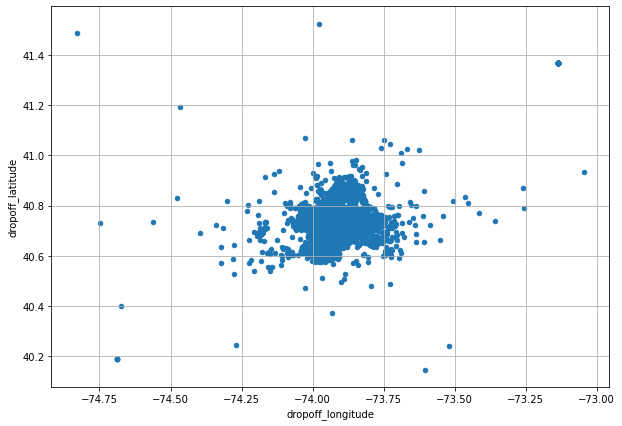

In [ ]:
train.plot(kind="scatter",x="dropoff_longitude",y="dropoff_latitude",figsize=(10,7))
plt.grid()
plt.show()

In [ ]:
## checking datatypes of various attributes in the train set
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Here "**key**" and "**pickup_datetime**" have data type as **object** so we need to convert them into datetime

In [ ]:
## converting "key" and "pickup_datetime" to date_time
train["key"]=pd.to_datetime(train["key"])
train["pickup_datetime"]=pd.to_datetime(train["pickup_datetime"])
test["key"]=pd.to_datetime(test["key"])
test["pickup_datetime"]=pd.to_datetime(test["pickup_datetime"])

In [ ]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [ ]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [ ]:
## calculating the Haversine distance and adding this values in the new feature : "H_distance"
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude') ##in kilometers

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [ ]:
## filtering the Haversine distance and taking values above 0km
train= train.loc[train["H_Distance"]>0]


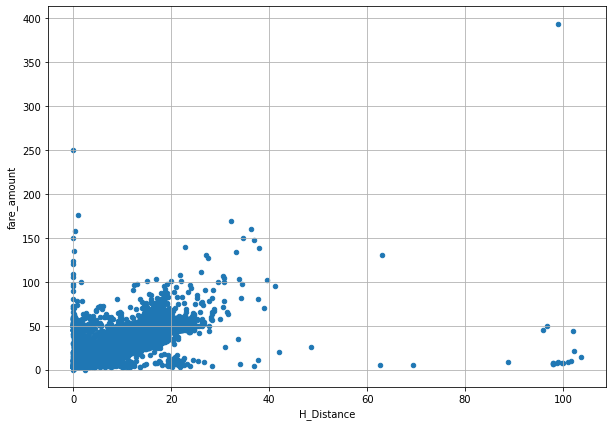

In [ ]:
train.plot(kind="scatter",x="H_Distance",y="fare_amount",figsize=(10,7))
plt.grid()
plt.show()

In [ ]:
count=0
for val in train["fare_amount"]:
  if(val>150):
    count+=1

count

7

In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
0,2009-04-08 19:11:10.000000400,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2,2009,4,8,2,19,1.116850
1,2012-07-30 16:19:08.000000300,4.9,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2,2012,7,30,0,16,1.055053
2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00+00:00,-73.971638,40.763382,-73.953767,40.783715,1,2011,2,22,1,13,2.715959
3,2010-10-07 21:09:35.000000200,14.1,2010-10-07 21:09:35+00:00,-74.003545,40.707399,-73.981312,40.750071,1,2010,10,7,3,21,5.101370
4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00+00:00,-74.004532,40.707465,-73.977908,40.745633,5,2009,10,2,4,22,4.800593


In [ ]:
## dropping the "key" and "pickup_datetime" column
train = train.drop(["key","pickup_datetime"],axis=1)
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
0,4.9,-73.998287,40.727490,-73.989854,40.735239,2,2009,4,8,2,19,1.116850
1,4.9,-73.966597,40.794345,-73.965682,40.803808,2,2012,7,30,0,16,1.055053
2,6.9,-73.971638,40.763382,-73.953767,40.783715,1,2011,2,22,1,13,2.715959
3,14.1,-74.003545,40.707399,-73.981312,40.750071,1,2010,10,7,3,21,5.101370
4,12.1,-74.004532,40.707465,-73.977908,40.745633,5,2009,10,2,4,22,4.800593


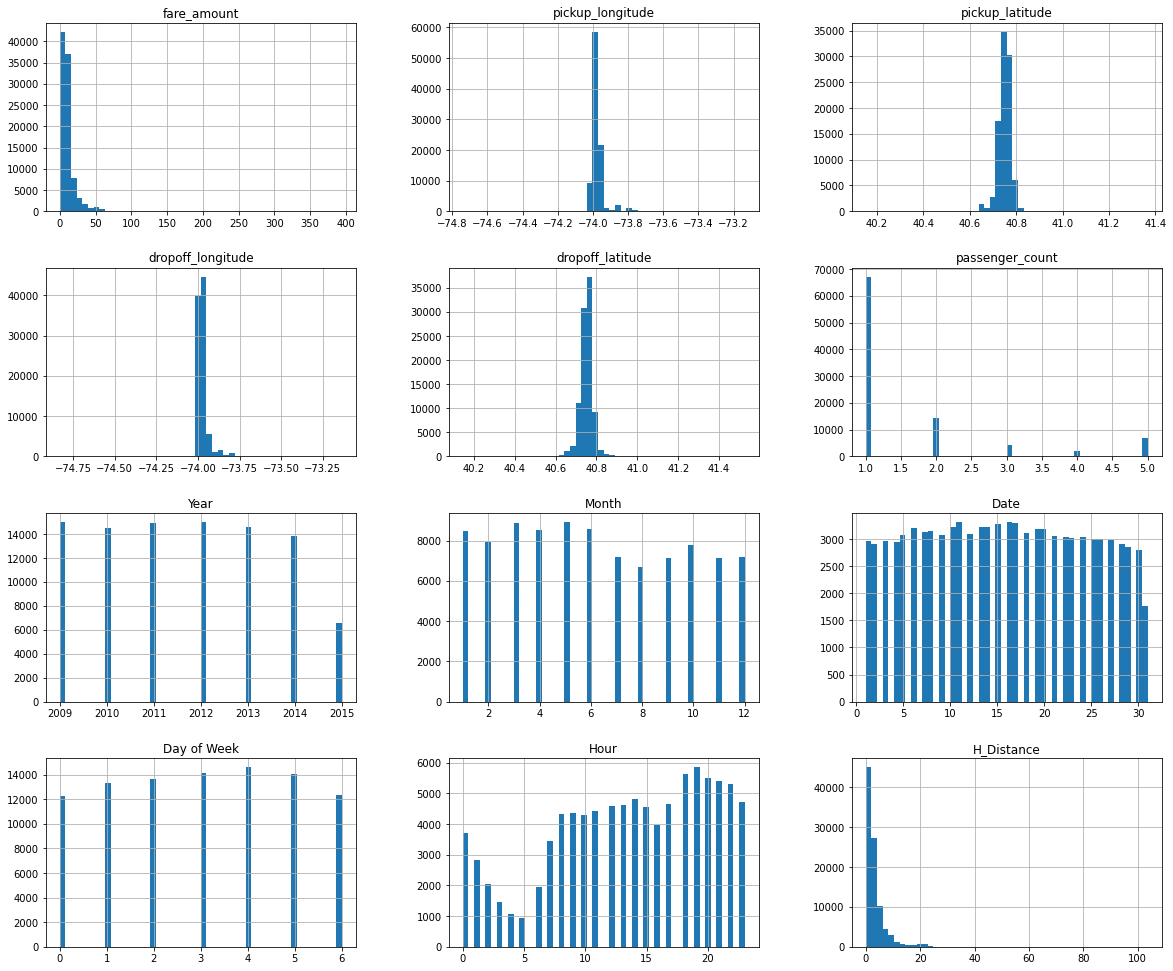

In [ ]:
train.hist(bins=50,figsize=(20,17))
plt.show()

from above plots we get how many observations every feature have

1**. Does the number of passengers affect the fare?**

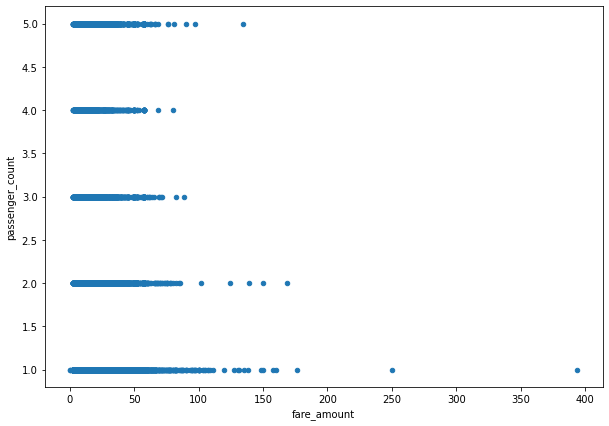

In [ ]:
train.plot(kind="scatter",x="fare_amount",y="passenger_count",figsize=(10,7))
plt.show()

**2. Does the date and time of pickup affect the fare?**

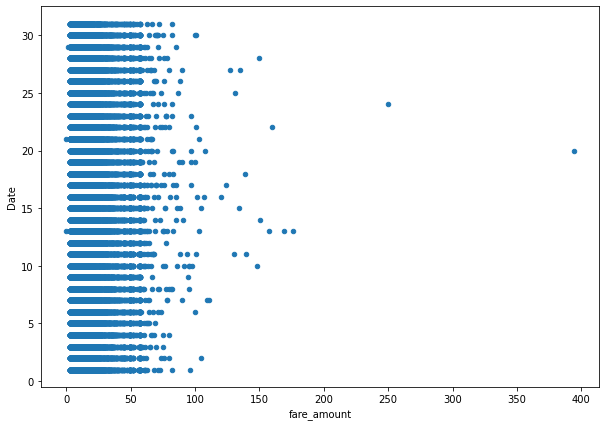

In [ ]:
train.plot(kind="scatter",x="fare_amount",y="Date",figsize=(10,7))
plt.show()

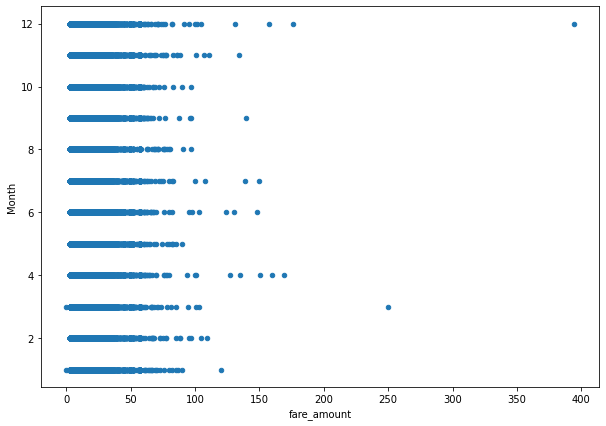

In [ ]:
train.plot(kind="scatter",x="fare_amount",y="Month",figsize=(10,7))
plt.show()

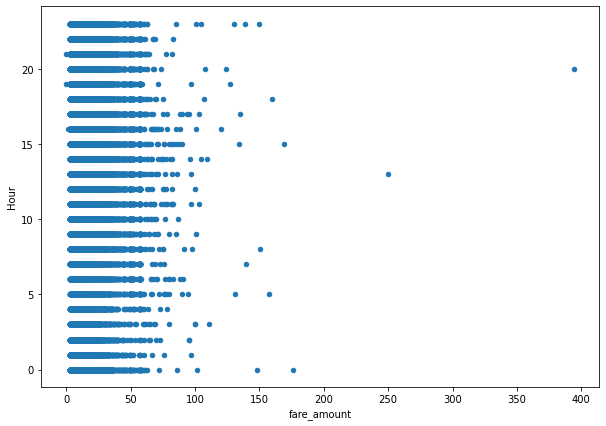

In [ ]:
train.plot(kind="scatter",x="fare_amount",y="Hour",figsize=(10,7))
plt.show()

**3. Does the day of the week affect the fare?**

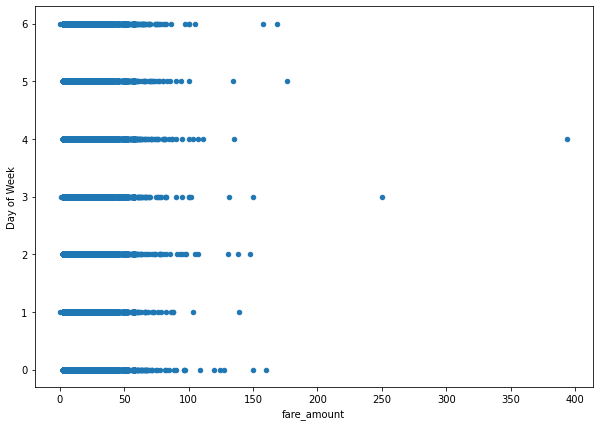

In [ ]:
train.plot(kind="scatter",x="fare_amount",y="Day of Week",figsize=(10,7))
plt.show()

**4. Does the distance affect the fare?**

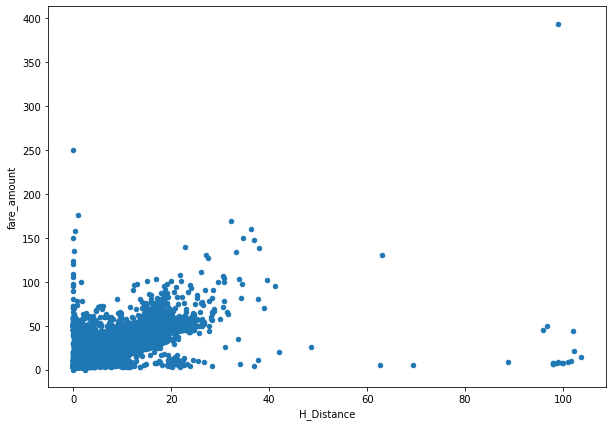

In [ ]:
train.plot(kind="scatter",x="H_Distance",y="fare_amount",figsize=(10,7))
plt.show()

In [ ]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Day of Week', 'Hour', 'H_Distance'],
      dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled_data=scaler.fit_transform(train)

In [ ]:
train_scaled_data

array([[-0.66640969, -0.62556801, -0.8265962 , ..., -0.52760008,
         0.84286406, -0.5878286 ],
       [-0.66640969,  0.24351825,  1.53547413, ..., -1.55282258,
         0.38240851, -0.60398032],
       [-0.45849593,  0.10527073,  0.44151282, ..., -1.04021133,
        -0.07804703, -0.16987531],
       ...,
       [ 0.33157633, -0.17953397,  0.25319729, ...,  1.01023368,
         0.84286406, -0.14573131],
       [-0.24018649,  0.52253634,  0.96293132, ...,  1.01023368,
         0.22892333, -0.33709766],
       [ 0.38355477, -0.38637046,  0.27810581, ...,  1.01023368,
         0.84286406, -0.14235708]])

In [ ]:
train_data= pd.DataFrame(train_scaled_data,columns=['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Day of Week', 'Hour', 'H_Distance'])
train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
0,-0.666410,-0.625568,-0.826596,-0.431510,-0.510253,0.352694,-1.454348,-0.659564,-0.884814,-0.527600,0.842864,-0.587829
1,-0.666410,0.243518,1.535474,0.261239,1.669061,0.352694,0.152327,0.213645,1.647306,-1.552823,0.382409,-0.603980
2,-0.458496,0.105271,0.441513,0.602713,1.030450,-0.515185,-0.383231,-1.241704,0.726535,-1.040211,-0.078047,-0.169875
3,0.289994,-0.769767,-1.536436,-0.186704,-0.038850,-0.515185,-0.918790,1.086855,-0.999910,-0.014989,1.149834,0.453591
4,0.082080,-0.796835,-1.534104,-0.089148,-0.179902,2.956331,-1.454348,1.086855,-1.575392,0.497622,1.303320,0.374978


**Building a Pipeline**

In [ ]:

my_pipeline=Pipeline([
    ('std_scaler',StandardScaler()),
    ('Linear_Regression',LinearRegression())
])

**K fold cross validation**

In [ ]:
train.shape

(94425, 12)

In [ ]:
dataFold0=train[:9442]
dataFold1=train[9442:18884]
dataFold2=train[18884:28326]
dataFold3=train[28326:37768]
dataFold4=train[37768:47210]
dataFold5=train[47210:56652]
dataFold6=train[56652:66094]
dataFold7=train[66094:75536]
dataFold8=train[75536:84978]
dataFold9=train[84978:]

In [ ]:
train0=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold4,dataFold5,dataFold6,dataFold7,dataFold8])
test0=dataFold9

train1=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold4,dataFold5,dataFold6,dataFold7,dataFold9])
test1=dataFold8

train2=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold4,dataFold5,dataFold6,dataFold8,dataFold9])
test2=dataFold7

train3=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold4,dataFold5,dataFold7,dataFold8,dataFold9])
test3=dataFold6

train4=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold4,dataFold6,dataFold7,dataFold8,dataFold9])
test4=dataFold5

train5=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold5,dataFold6,dataFold7,dataFold8,dataFold9])
test5=dataFold4

train6=pd.concat([dataFold0,dataFold1,dataFold2,dataFold4,dataFold5,dataFold6,dataFold7,dataFold8,dataFold9])
test6=dataFold3

train7=pd.concat([dataFold0,dataFold1,dataFold3,dataFold4,dataFold5,dataFold6,dataFold7,dataFold8,dataFold9])
test7=dataFold2

train8=pd.concat([dataFold0,dataFold2,dataFold3,dataFold4,dataFold5,dataFold6,dataFold7,dataFold8,dataFold9])
test8=dataFold1

train9=pd.concat([dataFold1,dataFold2,dataFold3,dataFold4,dataFold5,dataFold6,dataFold7,dataFold8,dataFold9])
test9=dataFold0

In [ ]:
train_set=[train0,train1,train2,train3,train4,train5,train6,train7,train8,train9]
test_set=[test0,test1,test2,test3,test4,test5,test6,test7,test8,test9]
scores=[]
RMSE_values=[]
predicted_values=[]
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split( train_set[i].drop("fare_amount",axis=1), train_set[i]["fare_amount"].copy(), test_size=0.33, random_state=42)
  model=my_pipeline.fit(X_train,y_train)
  score=my_pipeline.score(X_test,y_test)
  pred=my_pipeline.predict(test_set[i].drop("fare_amount",axis=1))
  predicted_values.append(pred)
  rmse= mean_squared_error(test_set[i]["fare_amount"],predicted_values[i],squared=False)
  scores.append(score)
  RMSE_values.append(rmse)
  
sum_score=0
sum_rmse=0
for i in range(10):
  sum_score+=scores[i]
  sum_rmse+=RMSE_values[i]
print("Average root mean squared error : ",sum_rmse/10)
print("Average accuracy : ",sum_score*10)

Average root mean squared error :  5.303272345891885
Average accuracy :  69.8780802288167


**Linear Regression**

Matrix Based approach

In [ ]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(train.drop("fare_amount",axis=1), train["fare_amount"].copy(), test_size=0.33, random_state=42)

In [ ]:
X_tr=X_Train.to_numpy()
Y_tr=Y_Train.to_numpy()
X_ts=X_Test.to_numpy()
Y_ts=Y_Test.to_numpy()

w = ((Xᵀ.X)^(-1). Xᵀ).Y

In [ ]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X_tr.T,X_tr)),X_tr.T), Y_tr)
w

array([ 4.76201449e+00, -1.21896975e+01, -1.67892461e+00, -1.22023570e+01,
        5.36544448e-02,  6.09358823e-01,  8.92776227e-02,  2.65229602e-03,
       -4.09080780e-02,  5.15335547e-03,  2.05202306e+00])

Now we will get predicted values of y whic is given by equation:
y_pred = X.w

In [ ]:
Y_predicted=np.dot(X_ts,w)

In [ ]:
Y_error = 100*np.divide((Y_ts-Y_predicted),Y_ts)
print("Percentage error in predicting fare amount is ",abs(Y_error).mean())
print("Accuracy ",100-abs(Y_error).mean())

Percentage error in predicting fare amount is  23.638998024884952
Accuracy  76.36100197511504


In [ ]:
MSE = mean_squared_error(Y_predicted,Y_ts)
print("Mean squared error : ",MSE)

Mean squared error :  29.433300279656464


Optimization Based approach

In [ ]:
test.drop(["key","pickup_datetime"],axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
sgd=SGDRegressor()
pipe_sgd = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
pipe_sgd.fit(X_tr,Y_tr)
score=pipe_sgd.score(X_ts,Y_ts)
predicted=pipe_sgd.predict(X_ts)
mse_=mean_squared_error(predicted,Y_ts)
print("Accuracy using Stochiometric Gradient Descent : ",score*100)
print("Mean squared error : ",mse_)

Accuracy using Stochiometric Gradient Descent :  68.45975379324814
Mean squared error :  28.90571015001621


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=4)
pipe_knn=make_pipeline(StandardScaler(),
                   KNeighborsRegressor(n_neighbors=4) )
test_knn=test.to_numpy()
model3=pipe_knn.fit(X_tr,Y_tr)
score=pipe_knn.score(X_ts,Y_ts)
predicted_fare_amounts=pipe_knn.predict(test_knn)
print("Accuracy using KNN : ",score*100)
print("Predicted fare amount values : \n",predicted_fare_amounts)

Accuracy using KNN :  78.18642238380633
Predicted fare amount values : 
 [11.625 10.625  5.925 ... 52.195 18.625  6.   ]


So from the above three approaches we got maximum accuracy using the non parametric approach in this case. So we will apply the **non paramteric approach(K nearest neighbour)** in this model

## Life Expectancy prediction




In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"vaish2211","key":"8db194b5e33beff5d7127e16cebae375"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d kumarajarshi/life-expectancy-who

life-expectancy-who.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip life-expectancy-who.zip

Archive:  life-expectancy-who.zip
replace Life Expectancy Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Life Expectancy Data.csv  


In [ ]:
df = pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
## checking no. of rows and columns
df.shape

(2938, 22)

In [ ]:
## list of columns
list(df.columns)

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [ ]:
## infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
## checking the no. of null values in each 
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

We can see from above values that we are getting lots of null values in some of the features so we need to replace those values with their mean

In [ ]:
## First separating the missing rows fro our dataframe  
missing_rows = df[df.isnull().any(axis=1)]
means=[]   ## list of men values of respective features
null_value_fetures=['Life expectancy ','Adult Mortality','Alcohol','Hepatitis B',' BMI ','Polio',
                    'Total expenditure','Diphtheria ','GDP','Population',' thinness  1-19 years',
                    ' thinness 5-9 years','Income composition of resources','Schooling']

##  replacing the NaN values with their respective mean
for i in range(len(null_value_fetures)):
  means.append(df[null_value_fetures[i]].mean())
  missing_rows[null_value_fetures[i]].fillna(means[i],inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
missing_rows

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,4.602861,0.000000,95.000000,63,...,95.0,5.93819,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.340000,25.018523,80.940461,15374,...,87.0,3.60000,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.360000,148.511984,80.940461,5862,...,86.0,3.73000,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.230000,147.986071,80.940461,2686,...,89.0,3.84000,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.250000,154.455944,80.940461,0,...,86.0,3.49000,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,Developing,46.4,64.0,39,2.330000,65.789974,80.940461,881,...,85.0,8.18000,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.440000,54.043480,80.940461,25036,...,85.0,6.93000,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.610000,46.830275,80.940461,16997,...,86.0,6.56000,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.620000,45.616880,80.940461,30930,...,85.0,7.16000,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


In [ ]:
missing_rows.isnull().sum()
## can see that all NaN values are removed from missing rows 

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
## dropping the rows having null nalues from df
df.dropna(inplace=True)

In [ ]:
df.shape

(1649, 22)

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
'''
 we will Concatenate the dataframe 'df' (from which we dropped rows having null values ) with the 
  missing_rows (where we replced the null values with respective mean)
'''
final_df = pd.concat([df,missing_rows])

In [ ]:
## checking count of null values in final_df
final_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
final_df.shape

(2938, 22)

Finally we got our final data frame 'final_df' with no NaN values

In [ ]:
final_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2922
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## converting the 'Country' names into three letter ISO country code format
from dataprep.clean import clean_country
final_df2 = clean_country(final_df, 'Country', output_format='alpha-3')

Country Cleaning Report:
	2938 values cleaned (100.0%)
Result contains 2938 (100.0%) values in the correct format and 0 null values (0.0%)


In [ ]:
## the three letter ISO country codes are stored in 'Country_clean'
final_df2['Country_clean']

0       AFG
1       AFG
2       AFG
3       AFG
4       AFG
       ... 
2933    ZWE
2934    ZWE
2935    ZWE
2936    ZWE
2937    ZWE
Name: Country_clean, Length: 2938, dtype: object

In [ ]:
## observing the life expectancy over different states
import plotly.express as px
fig = px.choropleth(final_df2, locations='Country_clean',
                    color="Life expectancy ", 
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

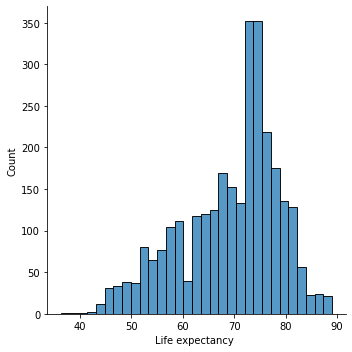

In [ ]:
sns.displot(final_df2,x="Life expectancy ")

In [ ]:
fig=px.violin(final_df2,x='Status',y='Life expectancy ',color='Status',title='Life expectancy vs country status')
fig.show()
## we can say that developed countries hve higher life expectancy

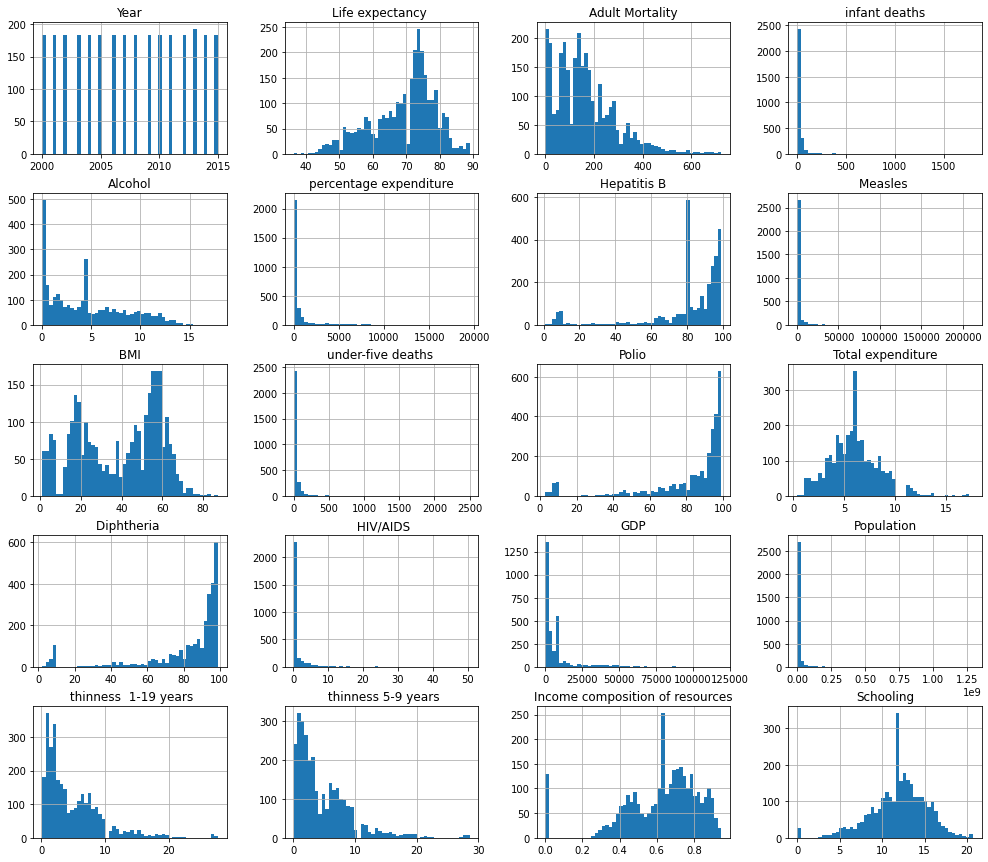

In [ ]:
final_df.hist(bins=50,figsize=(17,15))
plt.show()

In [ ]:
final_df2.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Country_clean'],
      dtype='object')

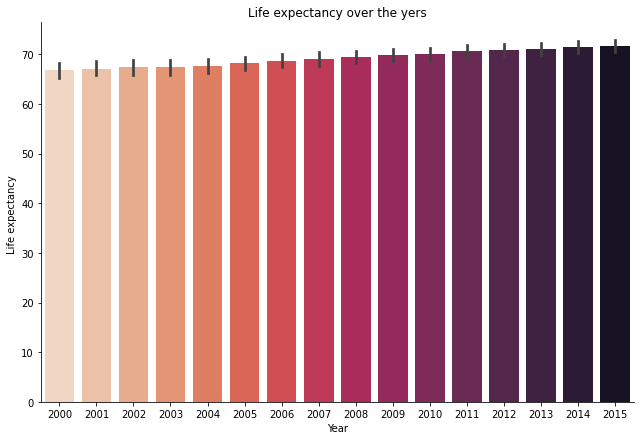

In [ ]:
sns.catplot(data=final_df2 ,x="Year", y='Life expectancy ',palette="rocket_r", kind="bar",height=6, aspect=1.5).set(title="Life expectancy over the yers")

we can see from above plot that **life expectancy has incresed over the years**

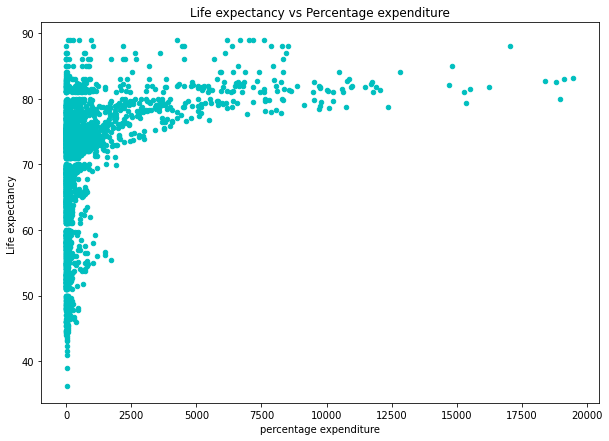

In [ ]:
final_df2.plot(kind="scatter",x='percentage expenditure',y='Life expectancy ',figsize=(10,7),color='c')
plt.title("Life expectancy vs Percentage expenditure")
plt.show()

As the percentage expenditure increases life expectancy also increses

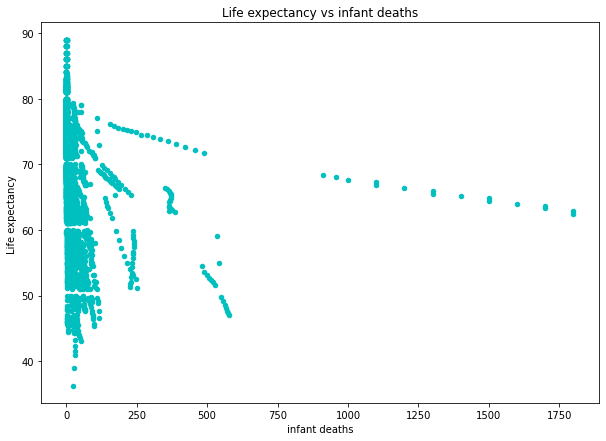

In [ ]:
final_df2.plot(kind="scatter",x='infant deaths',y='Life expectancy ',figsize=(10,7),color='c')
plt.title("Life expectancy vs infant deaths")
plt.show()

As the number of infant deaths increases life expectancy decreases

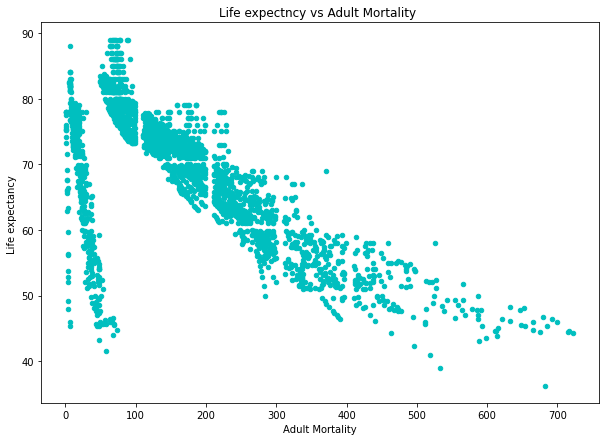

In [ ]:
final_df2.plot(kind="scatter",x='Adult Mortality',y='Life expectancy ',figsize=(10,7),color='c')
plt.title("Life expectncy vs Adult Mortality ")
plt.show()

As the adult mortality increases life expectancy decreases

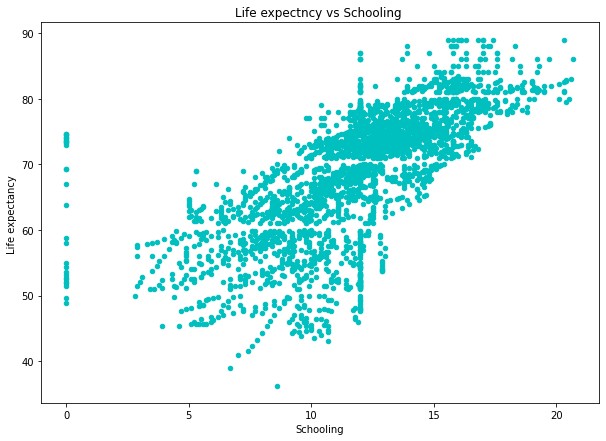

In [ ]:
final_df2.plot(kind="scatter",x='Schooling',y='Life expectancy ',figsize=(10,7),color='c')
plt.title("Life expectncy vs Schooling ")
plt.show()

As schooling increases Life expectancy also increases we can conclude that as people are getting educted they are becoming more health consious and thus life expectancy also increases

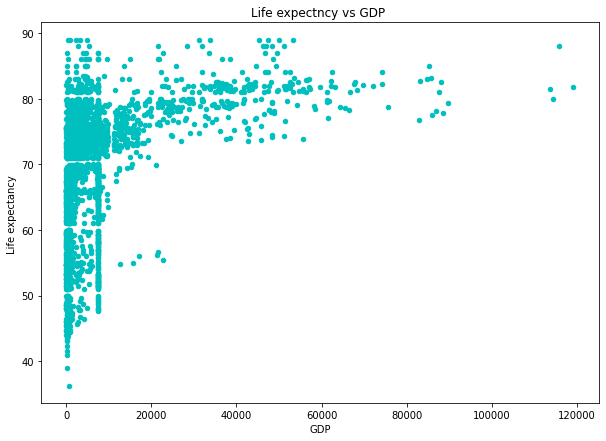

In [ ]:
final_df2.plot(kind="scatter",x='GDP',y='Life expectancy ',figsize=(10,7),color='c')
plt.title("Life expectncy vs GDP ")
plt.show()

In [ ]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Here 'Country' and 'Status' have data type as object, we need to convert then to integer form

In [ ]:
final_df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [ ]:
final_df['Country'].value_counts()

Afghanistan              16
Sweden                   16
Tajikistan               16
Thailand                 16
Timor-Leste              16
                         ..
San Marino                1
Saint Kitts and Nevis     1
Palau                     1
Marshall Islands          1
Niue                      1
Name: Country, Length: 193, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
final_df2['Country']=labelEncoder.fit_transform(final_df2['Country'])
final_df2['Status']=labelEncoder.fit_transform(final_df2['Status'])
final_df2.drop("Country_clean",axis=1,inplace=True)

In [ ]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int64  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Now we have succesfully converted the datatype of all features to numeric values

In [ ]:
corr_matrix=final_df2.corr()
corr_matrix.style.background_gradient(cmap="RdBu_r")


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,0.001342,-0.031635,-0.016745,0.039760,-0.030528,-0.060052,-0.032983,-0.018918,-0.024593,0.017724,-0.026509,0.017750,0.053226,-0.006119,0.090206,-0.015201,-0.014347,0.007988,0.022513,-0.023600,-0.025217
Year,0.001342,1.000000,0.001864,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Status,-0.031635,0.001864,1.000000,-0.481962,0.315171,0.112252,-0.579371,-0.454261,-0.095642,0.076955,-0.310873,0.115195,-0.220098,-0.289985,-0.216763,0.148590,-0.445911,0.041091,0.367934,0.366297,-0.457302,-0.491444
Life expectancy,-0.016745,0.169623,-0.481962,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,0.039760,-0.078861,0.315171,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.030528,-0.037415,0.112252,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.060052,-0.048168,-0.579371,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,-0.032983,0.031400,-0.454261,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,-0.018918,0.089398,-0.095642,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.024593,-0.082493,0.076955,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609


**Implementing Kolmogorov–Smirnov test**

In [ ]:
from scipy import stats
results=[]
for i in list(final_df2.columns):
  res = stats.kstest(final_df2[i], 'norm')
  results.append((i,res))

results


[('Country', KstestResult(statistic=0.9823124573121411, pvalue=0.0)),
 ('Year', KstestResult(statistic=1.0, pvalue=0.0)),
 ('Status', KstestResult(statistic=0.6670765364021032, pvalue=0.0)),
 ('Life expectancy ', KstestResult(statistic=1.0, pvalue=0.0)),
 ('Adult Mortality', KstestResult(statistic=0.9918427500282746, pvalue=0.0)),
 ('infant deaths', KstestResult(statistic=0.5722124276161502, pvalue=0.0)),
 ('Alcohol', KstestResult(statistic=0.6397660548769124, pvalue=0.0)),
 ('percentage expenditure',
  KstestResult(statistic=0.765922478906687, pvalue=0.0)),
 ('Hepatitis B', KstestResult(statistic=0.998266490773143, pvalue=0.0)),
 ('Measles ', KstestResult(statistic=0.607270290107641, pvalue=0.0)),
 (' BMI ', KstestResult(statistic=0.9811967335850476, pvalue=0.0)),
 ('under-five deaths ', KstestResult(statistic=0.58718860188436, pvalue=0.0)),
 ('Polio', KstestResult(statistic=0.9986501019683699, pvalue=0.0)),
 ('Total expenditure', KstestResult(statistic=0.9316014702046477, pvalue=0.0)

**Data Scaling**

In [ ]:
df2_scaled=scaler.fit_transform(final_df2)

In [ ]:
df2_scaled

array([[-1.69104231,  1.6217623 ,  0.45939851, ...,  2.77327898,
        -0.72540055, -0.57993072],
       [-1.69104231,  1.40498625,  0.45939851, ...,  2.81790246,
        -0.74005007, -0.61056961],
       [-1.69104231,  1.1882102 ,  0.45939851, ...,  2.86252595,
        -0.7693491 , -0.6412085 ],
       ...,
       [ 1.7231814 , -1.19632639,  0.45939851, ..., -0.79659991,
        -0.97932554, -0.61056961],
       [ 1.7231814 , -1.41310244,  0.45939851, ..., -0.70735294,
        -0.97932554, -0.6718474 ],
       [ 1.7231814 , -1.62987849,  0.45939851, ...,  1.41226265,
        -0.94514333, -0.6718474 ]])

In [ ]:
df2_scaledData= pd.DataFrame(df2_scaled,columns=['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'])
df2_scaledData.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-1.691042,1.621762,0.459399,-0.444448,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,...,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,-1.691042,1.404986,0.459399,-0.980950,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,...,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,-1.691042,1.188210,0.459399,-0.980950,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,...,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,-1.691042,0.971434,0.459399,-1.023029,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,...,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,-1.691042,0.754658,0.459399,-1.054587,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,...,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764


**Building a pipeline**

In [ ]:
pipe_part2 = Pipeline([
    ('stdScalar',StandardScaler()),
    ('lasso',Lasso(alpha=0.1))

])

**K fold cross validation**

In [ ]:
final_df2.shape

(2938, 22)

dividing the dataset into 10 equal parts

In [ ]:
dataFold0=final_df2[0:293]
dataFold1=final_df2[293:586]
dataFold2=final_df2[586:879]
dataFold3=final_df2[879:1172]
dataFold4=final_df2[1172:1465]
dataFold5=final_df2[1465:1758]
dataFold6=final_df2[1758:2051]
dataFold7=final_df2[2051:2344]
dataFold8=final_df2[2344:2637]
dataFold9=final_df2[2637:2930]

In [ ]:
train0=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold4,dataFold5,dataFold6,dataFold7,dataFold8])
test0=dataFold9

train1=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold4,dataFold5,dataFold6,dataFold7,dataFold9])
test1=dataFold8

train2=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold4,dataFold5,dataFold6,dataFold8,dataFold9])
test2=dataFold7

train3=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold4,dataFold5,dataFold7,dataFold8,dataFold9])
test3=dataFold6

train4=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold4,dataFold6,dataFold7,dataFold8,dataFold9])
test4=dataFold5

train5=pd.concat([dataFold0,dataFold1,dataFold2,dataFold3,dataFold5,dataFold6,dataFold7,dataFold8,dataFold9])
test5=dataFold4

train6=pd.concat([dataFold0,dataFold1,dataFold2,dataFold4,dataFold5,dataFold6,dataFold7,dataFold8,dataFold9])
test6=dataFold3

train7=pd.concat([dataFold0,dataFold1,dataFold3,dataFold4,dataFold5,dataFold6,dataFold7,dataFold8,dataFold9])
test7=dataFold2

train8=pd.concat([dataFold0,dataFold2,dataFold3,dataFold4,dataFold5,dataFold6,dataFold7,dataFold8,dataFold9])
test8=dataFold1

train9=pd.concat([dataFold1,dataFold2,dataFold3,dataFold4,dataFold5,dataFold6,dataFold7,dataFold8,dataFold9])
test9=dataFold0

In [ ]:
train_set=[train0,train1,train2,train3,train4,train5,train6,train7,train8,train9]
test_set=[test0,test1,test2,test3,test4,test5,test6,test7,test8,test9]
scores=[]
RMSE_values=[]
predicted_values=[]
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split( train_set[i].drop('Life expectancy ',axis=1), train_set[i]['Life expectancy '].copy(), test_size=0.33, random_state=42)
  model=my_pipeline.fit(X_train,y_train)
  score=my_pipeline.score(X_test,y_test)
  pred=my_pipeline.predict(test_set[i].drop('Life expectancy ',axis=1))
  predicted_values.append(pred)
  rmse= mean_squared_error(test_set[i]['Life expectancy '],predicted_values[i],squared=False)
  scores.append(score)
  RMSE_values.append(rmse)
  
sum_score=0
sum_rmse=0
for i in range(10):
  sum_score+=scores[i]
  sum_rmse+=RMSE_values[i]
print("Average root mean squared error : ",sum_rmse/10)
print("Average accuracy : ",sum_score*10)

Average root mean squared error :  4.385379794356329
Average accuracy :  82.4047357954174


**Feature Selection**

Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_tr, Y_tr) 
score_lasso=lasso.score(X_ts,Y_ts)
pred_train_lasso= lasso.predict(X_ts)
mse_lasso=mean_squared_error(Y_ts,pred_train_lasso)
print("Mean squared error : ",mse_lasso)
print("Accuracy using lasso regression : ",score_lasso*100)



Mean squared error :  29.690776532071226
Accuracy using lasso regression :  67.60313456991295
